In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/processed/features.csv")
df.head()

,Mean_Power,Variance,Peak_Frequency,Spectral_Entropy,Max_Amplitude,Label
0,0.499500,0.499500,50.0,3.332589,0.999999,0
1,0.624375,0.624375,50.0,4.118868,1.493535,1
2,0.778010,0.777807,50.0,6.622579,2.279381,2
3,0.999260,0.999260,50.0,5.954083,5.997923,3


In [3]:
X = df.drop("Label", axis=1)
y = df["Label"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

rf_acc

0.0

In [10]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

dt_acc

0.0

In [11]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

svm_acc


0.0

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)

knn_acc

C:\Users\User\OneDrive\Desktop\MY_SPACE\codes\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\OneDrive\Desktop\MY_SPACE\codes\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:

0.0

In [14]:
results = pd.DataFrame({
    "Model": ["kNN", "SVM", "Decision Tree", "Random Forest"],
    "Accuracy": [knn_acc, svm_acc, dt_acc, rf_acc]
})

results


,Model,Accuracy
0,kNN,0.0
1,SVM,0.0
2,Decision Tree,0.0
3,Random Forest,0.0


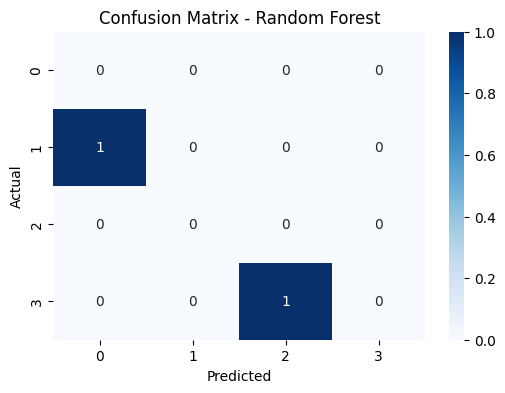

In [15]:
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
plt.savefig("../results/confusion_matrix_rf.png")


<Figure size 640x480 with 0 Axes>

In [17]:
print(classification_report(y_test, rf_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\User\OneDrive\Desktop\MY_SPACE\codes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\OneDrive\Desktop\MY_SPACE\codes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\OneDrive\Desktop\MY_SPACE\codes\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric

In [18]:
import joblib

joblib.dump(rf, "../models/random_forest_rfi.pkl")


['../models/random_forest_rfi.pkl']